In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df=pd.read_csv('Algerian_forest_fires_dataset_cleaned.csv')

In [3]:
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0.0
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0.0
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0.0
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0.0
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0.0


In [4]:
df.columns

Index(['day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes', 'Region'],
      dtype='object')

In [5]:
df.drop(['month','day','year'],axis=1,inplace=True)

In [6]:
df

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0.0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0.0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0.0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0.0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
238,30,65,14,0.0,85.4,16.0,44.5,4.5,16.9,6.5,fire,1.0
239,28,87,15,4.4,41.1,6.5,8.0,0.1,6.2,0.0,not fire,1.0
240,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,not fire,1.0
241,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,not fire,1.0


In [7]:
df['Classes'].value_counts()

Classes
fire             131
not fire         101
fire               4
fire               2
not fire           2
not fire           1
not fire           1
not fire           1
Name: count, dtype: int64

In [8]:
df['Classes']=np.where(df['Classes'].str.contains('not fire'),0,1)

In [9]:
df.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0,0.0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,0,0.0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0,0.0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,0,0.0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,0,0.0


In [10]:
df['Classes'].value_counts()

Classes
1    137
0    106
Name: count, dtype: int64

In [11]:
#Independent and dependent features
X=df.drop(['FWI'],axis=1)
y=df['FWI']

In [12]:
X

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0,0.0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0,0.0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0,0.0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0,0.0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
238,30,65,14,0.0,85.4,16.0,44.5,4.5,16.9,1,1.0
239,28,87,15,4.4,41.1,6.5,8.0,0.1,6.2,0,1.0
240,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0,1.0
241,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0,1.0


In [13]:
df.corr()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
Temperature,1.000000,-0.651400,-0.284510,-0.326492,0.676568,0.485687,0.376284,0.603871,0.459789,0.566670,0.516015,0.269555
RH,-0.651400,1.000000,0.244048,0.222356,-0.644873,-0.408519,-0.226941,-0.686667,-0.353841,-0.580957,-0.432161,-0.402682
Ws,-0.284510,0.244048,1.000000,0.171506,-0.166548,-0.000721,0.079135,0.008532,0.031438,0.032368,-0.069964,-0.181160
Rain,-0.326492,0.222356,0.171506,1.000000,-0.543906,-0.288773,-0.298023,-0.347484,-0.299852,-0.324422,-0.379097,-0.040013
FFMC,0.676568,-0.644873,-0.166548,-0.543906,1.000000,0.603608,0.507397,0.740007,0.592011,0.691132,0.769492,0.222241
DMC,0.485687,-0.408519,-0.000721,-0.288773,0.603608,1.000000,0.875925,0.680454,0.982248,0.875864,0.585658,0.192089
DC,0.376284,-0.226941,0.079135,-0.298023,0.507397,0.875925,1.000000,0.508643,0.941988,0.739521,0.511123,-0.078734
ISI,0.603871,-0.686667,0.008532,-0.347484,0.740007,0.680454,0.508643,1.000000,0.644093,0.922895,0.735197,0.263197
BUI,0.459789,-0.353841,0.031438,-0.299852,0.592011,0.982248,0.941988,0.644093,1.000000,0.857973,0.586639,0.089408
FWI,0.566670,-0.580957,0.032368,-0.324422,0.691132,0.875864,0.739521,0.922895,0.857973,1.000000,0.719216,0.197102


In [14]:
##Train Test Split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=42)

In [15]:
X_train.shape,X_test.shape

((182, 11), (61, 11))

<Axes: >

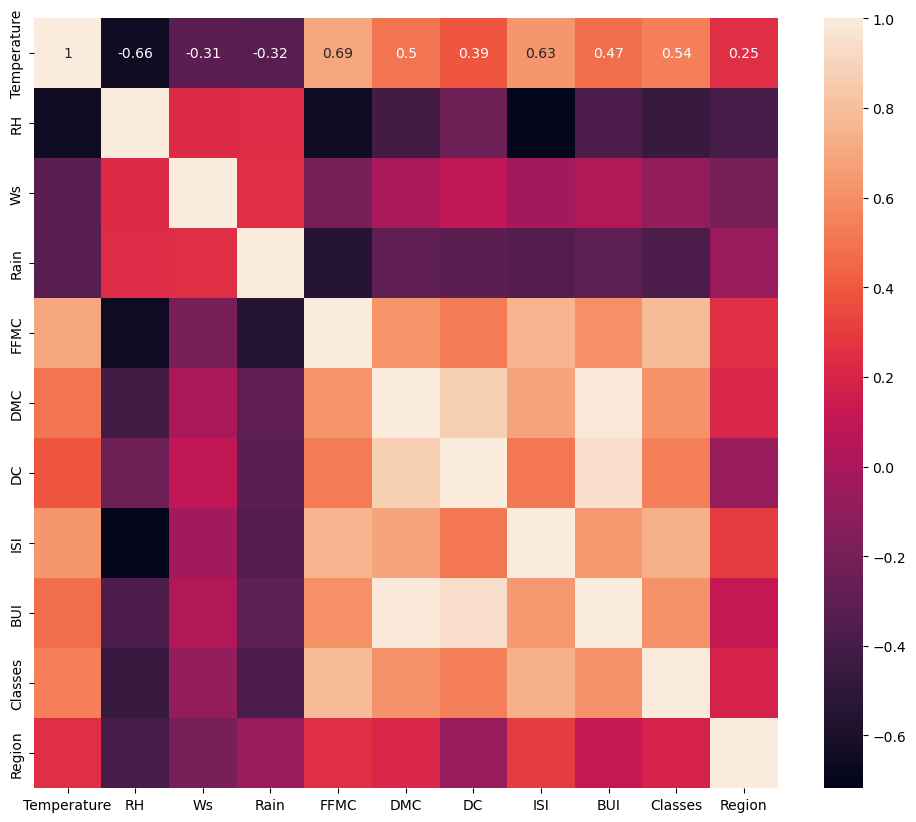

In [16]:
#Check for multicollinearity
plt.figure(figsize=(12,10))
corr=X_train.corr()
sns.heatmap(corr,annot=True)

In [17]:
def correlation(dataset, threshold):
    col_corr = set()
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: 
                colname = corr_matrix.columns[i]
                col_corr.add(colname)
    return col_corr

In [18]:
corr_features=correlation(X_train,0.85)

In [19]:
corr_features

{'BUI', 'DC'}

In [20]:
X_train.drop(corr_features,axis=1,inplace=True)
X_test.drop(corr_features,axis=1,inplace=True)
X_train.shape,X_test.shape

((182, 9), (61, 9))

In [21]:
X_train.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,ISI,Classes,Region
97,29,74,19,0.1,75.8,3.6,2.1,0,0.0
141,31,72,14,0.2,60.2,3.8,0.8,0,1.0
192,40,31,15,0.0,94.2,22.5,16.6,1,1.0
68,32,60,18,0.3,77.1,11.3,2.2,0,0.0
119,32,47,14,0.7,77.5,7.1,1.8,0,0.0


**Standardization/Feature Scaling**

In [23]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)

In [24]:
X_train_scaled

array([[-0.84284248,  0.78307967,  1.29972026, ..., -0.62963326,
        -1.10431526, -0.98907071],
       [-0.30175842,  0.64950844, -0.59874754, ..., -0.93058524,
        -1.10431526,  1.01105006],
       [ 2.13311985, -2.08870172, -0.21905398, ...,  2.7271388 ,
         0.90553851,  1.01105006],
       ...,
       [-1.9250106 ,  0.9166509 ,  0.54033314, ..., -1.06948615,
        -1.10431526, -0.98907071],
       [ 0.50986767, -0.21870454,  0.16063958, ...,  0.5973248 ,
         0.90553851,  1.01105006],
       [-0.57230045,  0.98343651,  2.05910739, ..., -0.86113478,
        -1.10431526, -0.98907071]])

Text(0.5, 1.0, 'X_train After Scaling')

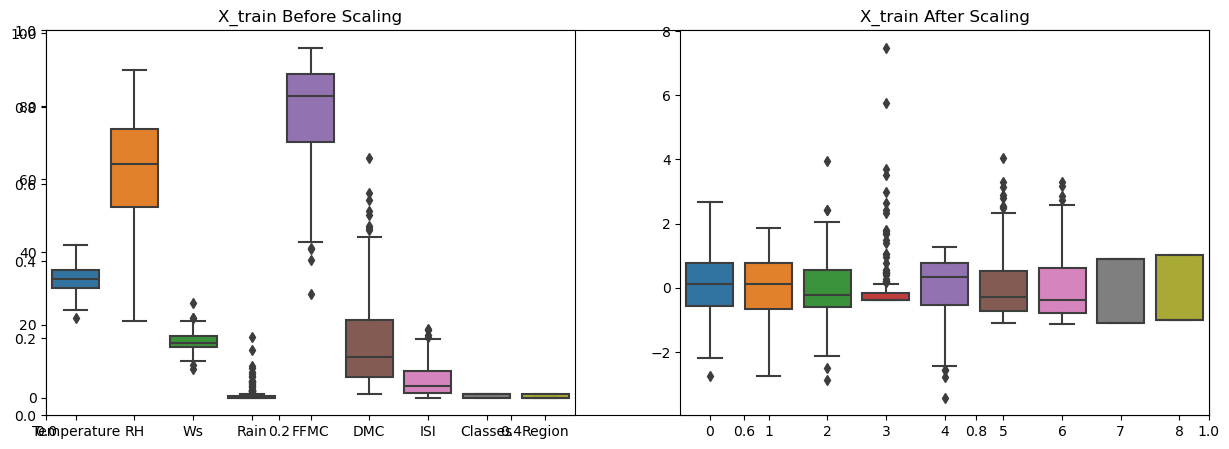

In [25]:
plt.subplots(figsize=(15, 5))
plt.subplot(1, 2, 1)
sns.boxplot(data=X_train)
plt.title('X_train Before Scaling')
plt.subplot(1, 2, 2)
sns.boxplot(data=X_train_scaled)
plt.title('X_train After Scaling')

**Linear Regression Model**

In [27]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error,r2_score
linreg=LinearRegression()
linreg.fit(X_train_scaled,y_train)
y_pred=linreg.predict(X_test_scaled)
score=r2_score(y_test,y_pred)
mae=mean_absolute_error(y_test,y_pred)

In [28]:
mae,score

(0.5468236465249977, 0.9847657384266952)

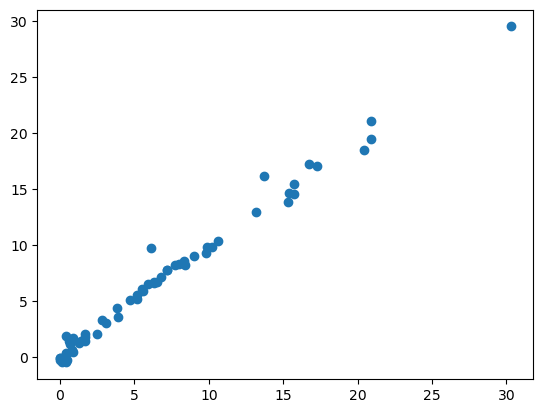

In [29]:
plt.scatter(y_test,y_pred)

**Lasso Regression**

1.1331759949144087 0.9492020263112388


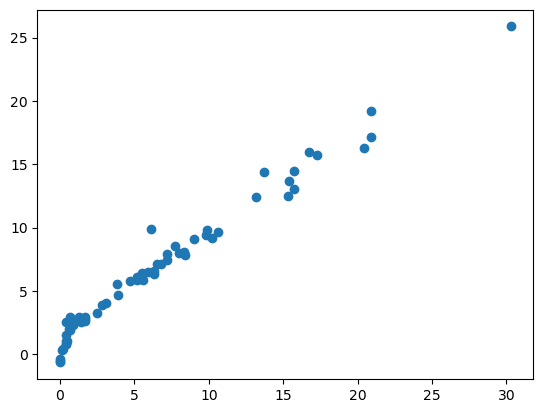

In [31]:
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_absolute_error,r2_score
lasso=Lasso()
lasso.fit(X_train_scaled,y_train)
y_pred2=lasso.predict(X_test_scaled)
score2=r2_score(y_test,y_pred2)
mae2=mean_absolute_error(y_test,y_pred2)
print(mae2,score2)
plt.scatter(y_test,y_pred2)

**Ridge Regression**

0.5642305340105683 0.9842993364555513


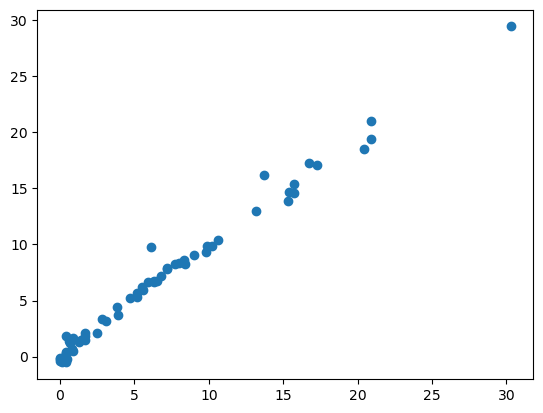

In [33]:
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_absolute_error,r2_score
ridge=Ridge()
ridge.fit(X_train_scaled,y_train)
y_pred3=ridge.predict(X_test_scaled)
score3=r2_score(y_test,y_pred3)
mae3=mean_absolute_error(y_test,y_pred3)
print(mae3,score3)
plt.scatter(y_test,y_pred3)

**ElasticNet Regression**

1.8822353634896 0.8753460589519703


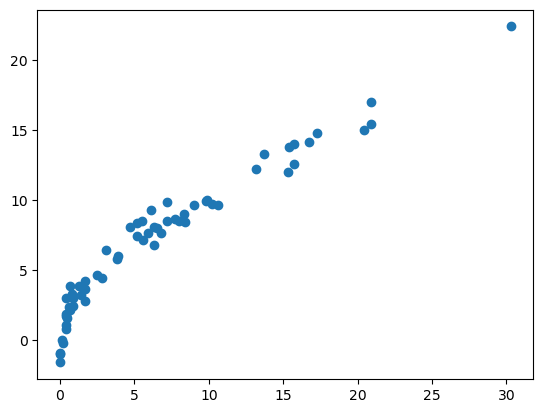

In [35]:
from sklearn.linear_model import ElasticNet
from sklearn.metrics import mean_absolute_error,r2_score
elasticNet=ElasticNet()
elasticNet.fit(X_train_scaled,y_train)
y_pred4=elasticNet.predict(X_test_scaled)
score4=r2_score(y_test,y_pred4)
mae4=mean_absolute_error(y_test,y_pred4)
print(mae4,score4)
plt.scatter(y_test,y_pred4)

Pickling the ML Model

In [42]:
import pickle
pickle.dump(scaler,open('scaler.pkl','wb'))
pickle.dump(ridge,open('ridge.pkl','wb'))